In [2]:
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader
from Train import train
from Model import Model

In [3]:
imdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/jpgs/rs19_val'
maskdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/uint8/rs19_val'
classes_ = {"rail-raised","rail-embedded"}
range_train = (0,0)
range_test = (3,4)
range_val = (7,8)

In [4]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [5]:
traindata[0][1].shape

torch.Size([2, 1080, 1920])

In [6]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [8]:
batchsize = 1
loss = BCEWithLogitsLoss()
lr = 0.0001
num_epochs = 50
model_path = ""

In [9]:
model = Model.UNet(num_classes=2)

In [10]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         loss,
                         batchsize,
                         lr,
                         num_epochs,
                         model_path)

In [11]:
Trainer.train()

Epoch: 1/50
Train loss: 0.669855, Test loss: 0.6662
Epoch: 2/50
Train loss: 0.665874, Test loss: 0.6621
Epoch: 3/50
Train loss: 0.662356, Test loss: 0.6585
Epoch: 4/50
Train loss: 0.659147, Test loss: 0.6550
Epoch: 5/50
Train loss: 0.656078, Test loss: 0.6513
Epoch: 6/50
Train loss: 0.652835, Test loss: 0.6470
Epoch: 7/50
Train loss: 0.649040, Test loss: 0.6419


KeyboardInterrupt: 

In [ ]:
Trainer.val()

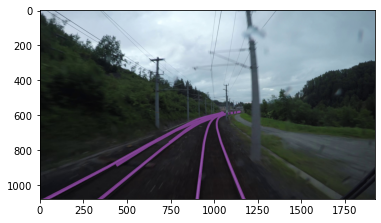

In [10]:
loader.visualize_result(traindata[0][0],traindata[0][1][2,:,:])